# **Proyecto 2 y 3**
El propósito de este proyecto es que los estudiantes apliquen los conocimientos adquiridos en análisis exploratorio de datos, normalización y limpieza de datos y modelos de aprendizaje automático.

## Importacion de librerias

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer


En este proyecto se utilizaran 3 criptomonedas, se unifican en un solo dataframe para mejor manejo.

In [176]:
df1 = pd.read_csv('./crypto_currencies/coin_Bitcoin.csv')
df2 = pd.read_csv('./crypto_currencies/coin_Litecoin.csv')
df3 = pd.read_csv('./crypto_currencies/coin_Monero.csv')

df = pd.concat([df1, df2, df3], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8584 entries, 0 to 8583
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        8584 non-null   int64  
 1   Name       8584 non-null   object 
 2   Symbol     8584 non-null   object 
 3   Date       8584 non-null   object 
 4   High       8584 non-null   float64
 5   Low        8584 non-null   float64
 6   Open       8584 non-null   float64
 7   Close      8584 non-null   float64
 8   Volume     8584 non-null   float64
 9   Marketcap  8584 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 670.8+ KB


In [177]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8.584000e+03,8.584000e+03
mean,1437.042754,2443.242526,2297.695559,2374.203672,2378.117650,4.297519e+09,4.351512e+10
std,835.835690,7603.848963,7109.136298,7375.720130,7383.372253,1.224228e+10,1.367798e+11
min,1.000000,0.251757,0.212967,0.220121,0.223522,0.000000e+00,1.279606e+06
25%,716.000000,9.812452,8.873865,9.349090,9.392102,3.418658e+06,2.134455e+08
50%,1431.000000,91.571416,85.498041,88.624752,88.675180,7.130490e+07,2.851460e+09
75%,2146.250000,469.253494,448.991257,458.386986,458.922989,2.058342e+09,9.183906e+09
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


Eliminacion de la hora en la variable date

In [178]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8584 entries, 0 to 8583
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        8584 non-null   int64  
 1   Name       8584 non-null   object 
 2   Symbol     8584 non-null   object 
 3   Date       8584 non-null   object 
 4   High       8584 non-null   float64
 5   Low        8584 non-null   float64
 6   Open       8584 non-null   float64
 7   Close      8584 non-null   float64
 8   Volume     8584 non-null   float64
 9   Marketcap  8584 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 670.8+ KB


### Visualizacion de datos nulos

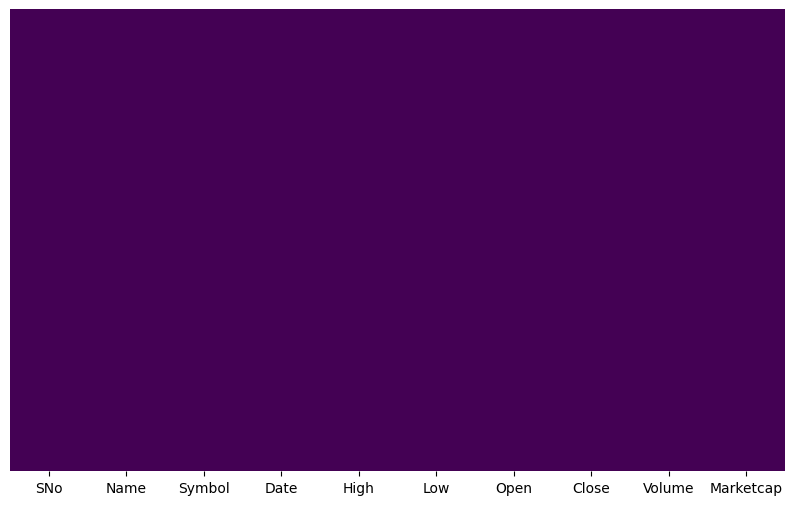

In [179]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

## Deteccion y eliminacion de valores atipicos
Histograma de precio criptomonedas

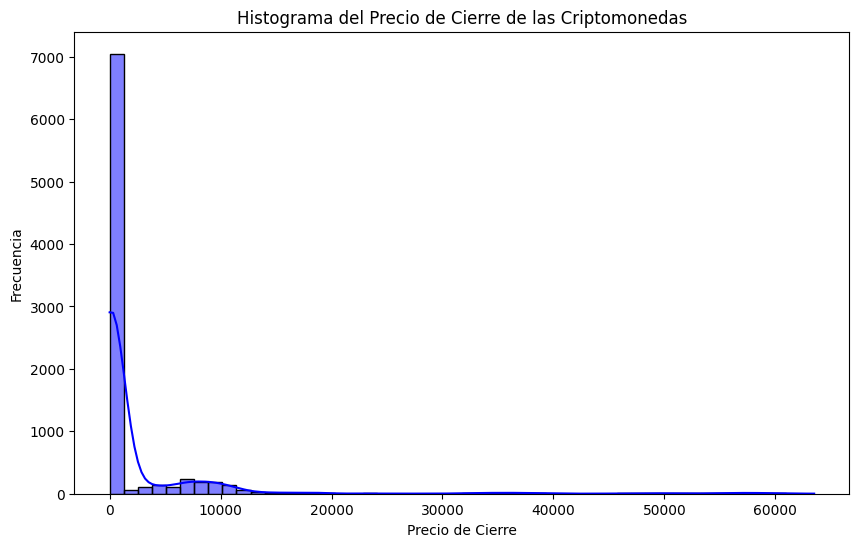

In [180]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=50, kde=True, color='blue')
plt.title('Histograma del Precio de Cierre de las Criptomonedas')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

Calculamos el rango intercuartil para filtrar los valores extremos

In [181]:
Q1, Q3 = df['Close'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lim_inferior, lim_superior = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
print(f"Limite Inferior: {lim_inferior}, Limite Superior: {lim_superior}")

Limite Inferior: -664.9042277336121, Limite Superior: 1133.2193188667297


In [182]:
df[(df['Close'] < lim_inferior) | (df['Close'] > lim_superior)]

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
219,220,Bitcoin,BTC,2013-12-04,1156.119995,1070.160034,1077.579956,1151.170044,0.000000e+00,1.390343e+10
1346,1347,Bitcoin,BTC,2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,3.449460e+08,1.857187e+10
1396,1397,Bitcoin,BTC,2017-02-23,1176.619995,1116.959961,1117.270020,1166.719971,1.894540e+08,1.887744e+10
1397,1398,Bitcoin,BTC,2017-02-24,1200.390015,1131.959961,1172.709961,1173.680054,3.307590e+08,1.899242e+10
1398,1399,Bitcoin,BTC,2017-02-25,1174.849976,1124.589966,1170.410034,1143.839966,1.399610e+08,1.851191e+10
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


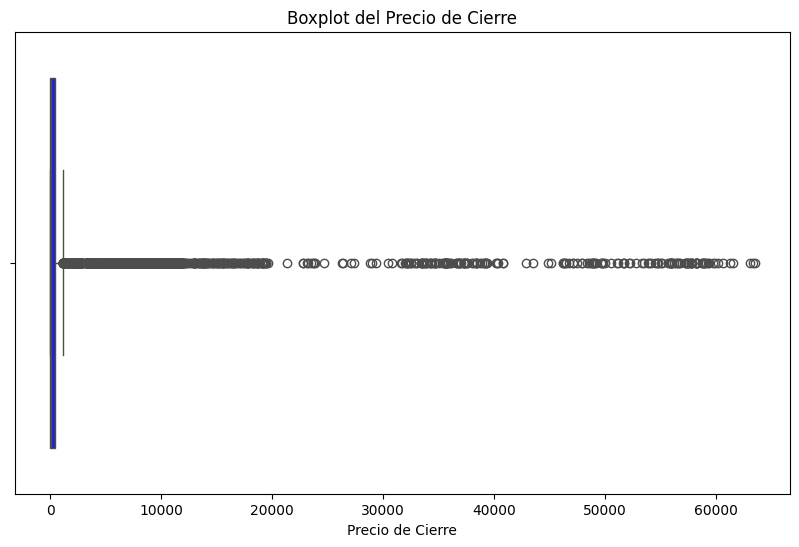

In [183]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Close'], color='blue')
plt.title('Boxplot del Precio de Cierre')
plt.xlabel('Precio de Cierre')
plt.show()

In [184]:
df = df[(df['Close'] >= lim_inferior) & (df['Close'] <= lim_superior)]

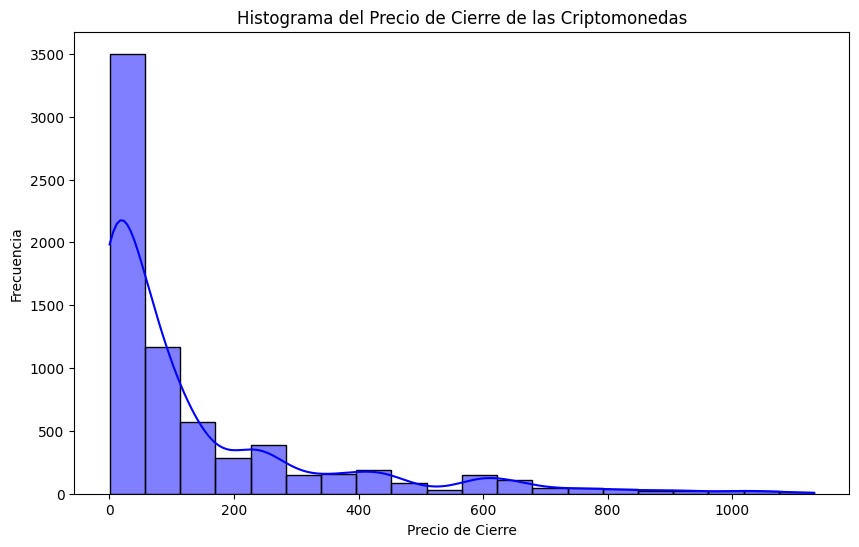

In [185]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=20, kde=True, color='blue')
plt.title('Histograma del Precio de Cierre de las Criptomonedas')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

## Codificacion de variables categoricas
Usaremos One-Hot Encoding para convertir el nombre de las criptomonedas en variables binarias

In [186]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_crypto_name = encoder.fit_transform(df[['Name']])
name_columns = encoder.get_feature_names_out(['Name'])
encoded_df = pd.DataFrame(encoded_crypto_name, columns=name_columns)

df = df.reset_index(drop=True).join(encoded_df)
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Name_Bitcoin,Name_Litecoin,Name_Monero
0,1,Bitcoin,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,1.0,0.0,0.0
1,2,Bitcoin,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,1.0,0.0,0.0
2,3,Bitcoin,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,1.0,0.0,0.0
3,4,Bitcoin,BTC,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,1.0,0.0,0.0
4,5,Bitcoin,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001,2598,Monero,XMR,2021-07-02,211.666077,199.608531,206.252403,211.345143,1.519434e+08,3.792466e+09,0.0,0.0,1.0
7002,2599,Monero,XMR,2021-07-03,216.327967,207.042192,211.458163,214.752778,1.364141e+08,3.853768e+09,0.0,0.0,1.0
7003,2600,Monero,XMR,2021-07-04,224.909012,213.023069,214.839958,219.841418,1.697858e+08,3.945232e+09,0.0,0.0,1.0
7004,2601,Monero,XMR,2021-07-05,220.354191,206.502607,219.961957,214.464993,1.709852e+08,3.848898e+09,0.0,0.0,1.0


In [187]:
df = df.drop(columns=['Name'])
df.reset_index(drop=True, inplace=True)
df

,SNo,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Name_Bitcoin,Name_Litecoin,Name_Monero
0,1,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,1.0,0.0,0.0
1,2,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,1.0,0.0,0.0
2,3,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,1.0,0.0,0.0
3,4,BTC,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,1.0,0.0,0.0
4,5,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7001,2598,XMR,2021-07-02,211.666077,199.608531,206.252403,211.345143,1.519434e+08,3.792466e+09,0.0,0.0,1.0
7002,2599,XMR,2021-07-03,216.327967,207.042192,211.458163,214.752778,1.364141e+08,3.853768e+09,0.0,0.0,1.0
7003,2600,XMR,2021-07-04,224.909012,213.023069,214.839958,219.841418,1.697858e+08,3.945232e+09,0.0,0.0,1.0
7004,2601,XMR,2021-07-05,220.354191,206.502607,219.961957,214.464993,1.709852e+08,3.848898e+09,0.0,0.0,1.0


## Normalizacion de datos
Se normalizaran los datos con Z-Score, este tipo de normalizacion es mejor para manejar outliers y para el modelo de regresion lineal.
Antes de la normalizacion, veremos como esta distribuido el `Marketcap` a traves de un histograma.

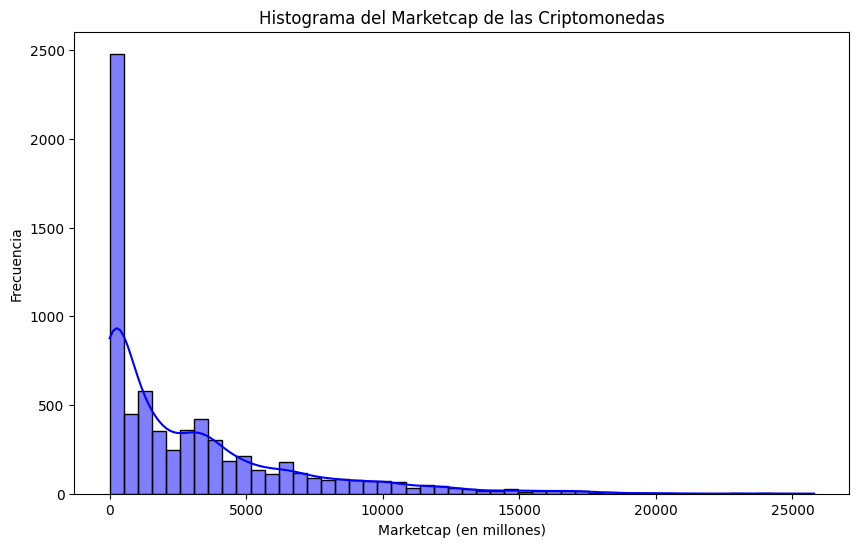

In [188]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Marketcap'] / 1e6, bins=50, kde=True, color='blue')  # Escala en millones
plt.title('Histograma del Marketcap de las Criptomonedas')
plt.xlabel('Marketcap (en millones)')
plt.ylabel('Frecuencia')
plt.show()

In [189]:
#Normalizacion de datos
df.loc[:, 'Close'] = StandardScaler().fit_transform(df[['Close']])
df.loc[:, 'Marketcap'] = StandardScaler().fit_transform(df[['Marketcap']])

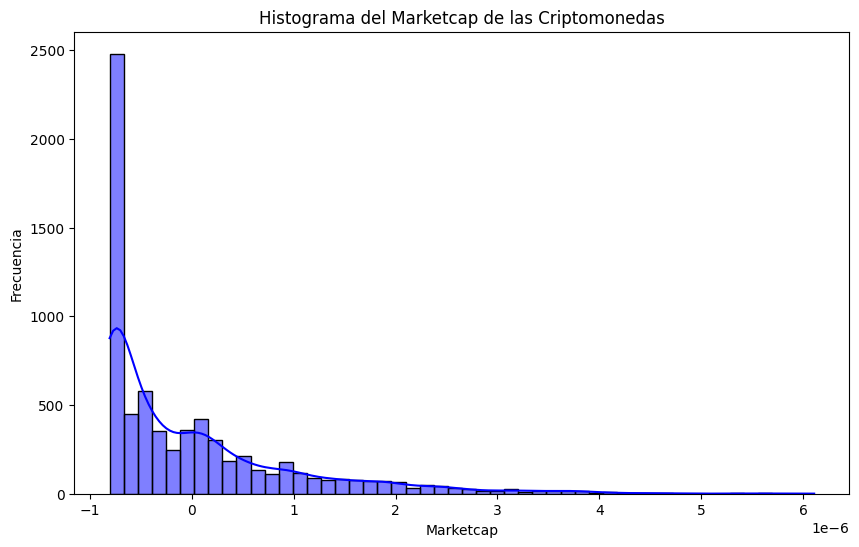

In [190]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Marketcap'] / 1e6, bins=50, kde=True, color='blue')  # Escala en millones
plt.title('Histograma del Marketcap de las Criptomonedas')
plt.xlabel('Marketcap')
plt.ylabel('Frecuencia')
plt.show()

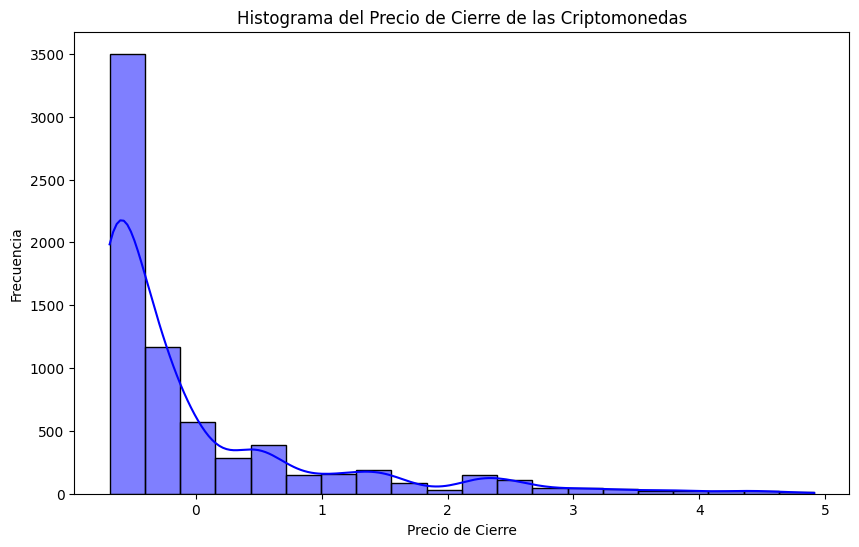

In [191]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=20, kde=True, color='blue')
plt.title('Histograma del Precio de Cierre de las Criptomonedas')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()